# Regression analysis of Weather Data of Szeged

1st of all we will install all the required packaged

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Importing

Then we will import the data 

In [3]:
os.chdir(R'A:\Work\Course\Analytics\IVY Pro\Python\Part B Data Analysis\Regression\Case Study 2')
path_data = os.getcwd()
weather_data = pd.read_csv('WeatherHistory.csv')
weather_data.head(3)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.


Here we have looked the data frame. However it makes sense to find relation between variables, looking at categorical variables and then also removing outliers

# Exploratory Data Analysis

In [4]:
All=weather_data.describe(include='all')# describes allnumerical and  categorical data
Cat=weather_data.describe(include=['O'])# describes all  categorical data
Cor=weather_data.corr()
data_set=weather_data.iloc[:,[0,2,3,4,5,8]]
Cor_s=data_set.corr()

In [117]:
Cor

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,NaN,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,NaN,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,NaN,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,NaN,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,NaN,-0.011651
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,NaN,0.059818
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,NaN,1.000000


In [18]:
data_set.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Visibility (km)
count,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.347325
std,9.551546,10.696847,0.195473,4.192123
min,-21.822222,-27.716667,0.000000,0.000000
25%,4.688889,2.311111,0.600000,8.339800
50%,12.000000,12.000000,0.780000,10.046400
75%,18.838889,18.838889,0.890000,14.812000
max,39.905556,39.344444,1.000000,16.100000


In [5]:
data_set.head()

,Formatted Date,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Visibility (km)
0,2006-04-01 00:00:00.000 +0200,rain,9.472222,7.388889,0.89,15.8263
1,2006-04-01 01:00:00.000 +0200,rain,9.355556,7.227778,0.86,15.8263
2,2006-04-01 02:00:00.000 +0200,rain,9.377778,9.377778,0.89,14.9569
3,2006-04-01 03:00:00.000 +0200,rain,8.288889,5.944444,0.83,15.8263
4,2006-04-01 04:00:00.000 +0200,rain,8.755556,6.977778,0.83,15.8263


In [6]:
Cor_s

,Temperature (C),Apparent Temperature (C),Humidity,Visibility (km)
Temperature (C),1.000000,0.992629,-0.632255,0.392847
Apparent Temperature (C),0.992629,1.000000,-0.602571,0.381718
Humidity,-0.632255,-0.602571,1.000000,-0.369173
Visibility (km),0.392847,0.381718,-0.369173,1.000000


In [151]:
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers
outlier_data = detect_outlier(data_set["Humidity"])
print (outlier_data)

#Removing the Outliers
data_set_clean = data_set[data_set["Humidity"]>0.15]


[0.14, 0.14, 0.14, 0.13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12, 0.14]


### Checking outlier for Temperature 

In [8]:
outlier_data = detect_outlier(data_set["Temperature (C)"])
print (outlier_data)

[0.14, 0.14, 0.14, 0.13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12, 0.14, -17.655555555555555, -20.0, -20.0, -21.822222222222223, -20.0, -17.22222222222222, -16.91111111111111, -17.22222222222222, -17.22222222222222, -19.02777777777778, -19.444444444444443, -20.0, -19.166666666666668, -20.55555555555556, -17.77777777777778, -16.894444444444446, -17.22222222222222, -17.22222222222222, -16.87777777777778, -17.77777777777778, -20.0, -18.51111111111111, -17.77777777777778, -17.294444444444444, -17.22222222222222, -17.22222222222222, -19.77777777777778, -20.0, -19.444444444444443, -20.05, -21.11111111111111, -20.55555555555556, -20.27777777777778, -21.11111111111111, -21.11111111111111, -20.78333333333333, -18.88888888888889, -18.405555555555555, -17.77777777777778]


**Now we can see that there are lot of values beyond 3 standard deviation. So we can say there is outlier. It basically means there are fat tails**

### Checking outlier for Apparent Temperature

In [9]:
outlier_data = detect_outlier(data_set["Apparent Temperature (C)"])
print (outlier_data)

[0.14, 0.14, 0.14, 0.13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12, 0.14, -17.655555555555555, -20.0, -20.0, -21.822222222222223, -20.0, -17.22222222222222, -16.91111111111111, -17.22222222222222, -17.22222222222222, -19.02777777777778, -19.444444444444443, -20.0, -19.166666666666668, -20.55555555555556, -17.77777777777778, -16.894444444444446, -17.22222222222222, -17.22222222222222, -16.87777777777778, -17.77777777777778, -20.0, -18.51111111111111, -17.77777777777778, -17.294444444444444, -17.22222222222222, -17.22222222222222, -19.77777777777778, -20.0, -19.444444444444443, -20.05, -21.11111111111111, -20.55555555555556, -20.27777777777778, -21.11111111111111, -21.11111111111111, -20.78333333333333, -18.88888888888889, -18.405555555555555, -17.77777777777778, -21.71666666666667, -21.255555555555556, -21.55555555555556, -21.75, -21.922222222222224, -21.399999999999995, -22.09444444444444, -21.77777777777778, -21.

**Here also we have lot of points so we can say that we cant rule out values beyond 3 standard deviation**

# Data Visualization

Now lets have some visual plots of the data

<AxesSubplot:xlabel='Temperature (C)', ylabel='Humidity'>

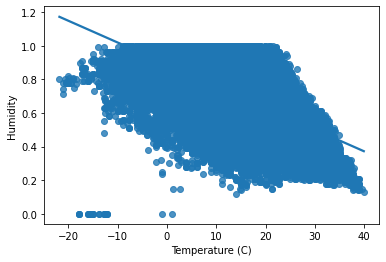

In [16]:
# plotting a scatter plot between temp and humdity
sns.regplot(x=data_set["Temperature (C)"], y=data_set["Humidity"])

So we can see there is negative corelation between temperature and humidity. But that corelation doesnt seem to be very strong

<AxesSubplot:xlabel='Temperature (C)', ylabel='Apparent Temperature (C)'>

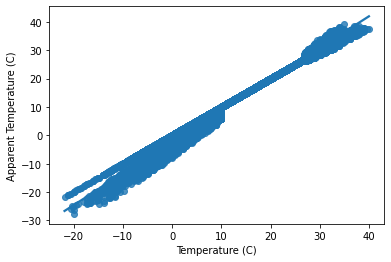

In [29]:
sns.regplot(x=data_set["Temperature (C)"], y=data_set["Apparent Temperature (C)"])

Now temperature and apparent temperature has quite a strong positive corelation

<AxesSubplot:xlabel='Temperature (C)', ylabel='Visibility (km)'>

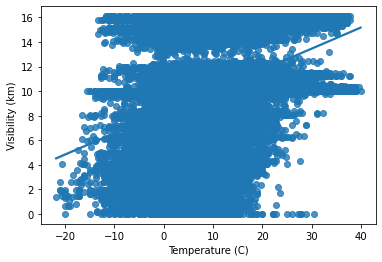

In [30]:
sns.regplot(x=data_set["Temperature (C)"], y=data_set["Visibility (km)"])

So it seems that temperature and visibility dont have any kind of corelation, but we saw from corelation table that they are actually related

# Creating the Independendent and Dependent Data Sets

In [35]:
y= data_set_clean.iloc[:,[2]] # Dependent Data
X= data_set_clean.iloc[:,[1,3,4]] #Feature Data

X1= pd.get_dummies(X, columns =['Precip Type'])

So we divided the data in dependent and independent data. However we did not that the original data, we took the clean data set where we have filtered the outliers. 

After dividing the data we also converted the categorical variable 'Precip Type' into dummy variables

In [36]:
X1.head()

,Apparent Temperature (C),Humidity,Precip Type_rain,Precip Type_snow
0,7.388889,0.89,1,0
1,7.227778,0.86,1,0
2,9.377778,0.89,1,0
3,5.944444,0.83,1,0
4,6.977778,0.83,1,0


Now 'Precip Type' is converted into two dummy variables one is rain and other one is snow

# Splitting the dataset into the Training set and Test set

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.2, random_state = 0)

Here we have split the data into training and test. Where Y data set which contains temperature is taken as dependent variable while X1, which is data with dummy variables is taken as independent variables

# Fitting multiple linear regression to training set 

## Using Sklearn

In [39]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

regressor.coef_

array([[ 0.8505005 , -2.7423763 ,  0.3867599 ,  0.04914733]])

**So we have used machine learning model for regression on training data set. However the point is that we cannot get diagnostic tests of them. We can only get co-effecients. Hence for regression we prefer stats model. As there we can get model diagnostic**

In [40]:
regressor.intercept_

array([4.36937561])

# Predicting the Test set results

In [41]:
y_pred = regressor.predict(X_test)
y_pred_data=pd.DataFrame(y_pred)

regressor.score(X_train,y_train)

0.987306401824711

In [42]:
y_pred_data

,0
0,14.944333
1,3.579130
2,25.655832
3,30.010525
4,25.155263
...,...
19278,29.300016
19279,6.374479
19280,23.961960
19281,9.790105


In [73]:
regressor.score(X_test,y_test)

0.9870720140762889

**Now we got the R-square of test data also. So we can see that R-square of both is quite high which is good thing. Hence we can say that this is good model**.

**Now we got the Rsquare. Also we have seen the co-effecients and intercept of our regession model using Sklearn. However the problem is we cannot know the significance level of co-effecients using Sklearn model. We have no idea what is the p-value of these models. Thats because this is not stats based model. This is machine learning based modek. We can just know the R-square**

In [43]:
from sklearn import metrics
import math
print(math.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.0828963217076644


**So thats the RMSE of this data**

## Using Stats Model for Regression

In [44]:
X_train=sm.add_constant(X_train)
X_test=sm.add_constant(X_test)

When we use stats model we need to add constant term also that will give us intercept.

In [45]:
X_train_d=pd.DataFrame(X_train)
X_test_d =pd.DataFrame(X_test)

In [46]:
model_train = sm.OLS(y_train,X_train_d).fit()
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 1.500e+06
Date:                Tue, 19 Jul 2022   Prob (F-statistic):               0.00
Time:                        23:32:59   Log-Likelihood:            -1.1506e+05
No. Observations:               77132   AIC:                         2.301e+05
Df Residuals:                   77127   BIC:                         2.302e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        4.3694      0.058     75.944      0.000       4.257       4.482
Apparent Temperature (C)     0.8505      0.001   1562.390      0.000       0.849       0.852
Humidity                    -2.7424      0.025   -108.364      0.000      -2.792      -2.693
Precip Type_rain             0.3868      0.053      7.265      0.000       0.282       0.491
Precip Type_snow             0.0491      0.055      0.897      0.370      -0.058       0.157
==============================================================================
Omnibus:                     1332.060   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2439.022
Skew:                          -0.115   Prob(JB):                         0.00
Kurtosis:                       3.840   Cond. No.                         369.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
Model_1train_Coef=pd.concat([pd.DataFrame(model_train.params),pd.DataFrame(model_train.pvalues)], axis = 1)
Model_1train_Coef.columns=['Coef', 'P-value']

**Here we have got the results of our model. We can see that all the variables except "Precip Type_snow" is in-signifiacnt. So we need to remove it. Thats happening due to dummy variable trap, which will get further justified after we do VIF**

In [47]:
model_test = sm.OLS(y_test,X_test_d).fit()

model_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 3.680e+05
Date:                Tue, 19 Jul 2022   Prob (F-statistic):               0.00
Time:                        23:45:09   Log-Likelihood:                -28895.
No. Observations:               19283   AIC:                         5.780e+04
Df Residuals:                   19278   BIC:                         5.784e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        4.4650      0.114     38.996      0.000       4.241       4.689
Apparent Temperature (C)     0.8493      0.001    775.923      0.000       0.847       0.851
Humidity                    -2.7231      0.051    -53.413      0.000      -2.823      -2.623
Precip Type_rain             0.2909      0.106      2.756      0.006       0.084       0.498
Precip Type_snow            -0.0725      0.109     -0.668      0.504      -0.286       0.140
==============================================================================
Omnibus:                      235.033   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              384.280
Skew:                          -0.096   Prob(JB):                     3.59e-84
Kurtosis:                       3.664   Cond. No.                         362.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**So using both test and train data we can see that adjusted R-square is very high, also we can see that precip Type_snow doesnt have significant relation**

### Checking for VIF

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] =[variance_inflation_factor(X_train_d.values, j) for j in range(X_train_d.shape[1])]
vif["features"] = X_train_d.columns
vif.round(1)


,VIF Factor,features
0,220.7,const
1,2.3,Apparent Temperature (C)
2,1.6,Humidity
3,19.4,Precip Type_rain
4,19.7,Precip Type_snow


**So these dummy variables have high VIF. Hence we should remove one of the variable**

In [84]:
New_X_train = X_train_d.drop(["Precip Type_snow"],axis = 1)
New_X_test = X_test_d.drop(["Precip Type_snow"],axis = 1)

In [85]:
New_X_train_d=pd.DataFrame(New_X_train)
New_X_test_d =pd.DataFrame(New_X_test)

In [86]:
model_train_new = sm.OLS(y_train,New_X_train_d).fit()
print("Summary for train-->")
model_train_new.summary()

Summary for train-->


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 2.000e+06
Date:                Wed, 20 Jul 2022   Prob (F-statistic):               0.00
Time:                        00:06:39   Log-Likelihood:            -1.1506e+05
No. Observations:               77132   AIC:                         2.301e+05
Df Residuals:                   77128   BIC:                         2.302e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        4.4166      0.023    191.299      0.000       4.371       4.462
Apparent Temperature (C)     0.8504      0.001   1574.412      0.000       0.849       0.851
Humidity                    -2.7432      0.025   -108.468      0.000      -2.793      -2.694
Precip Type_rain             0.3409      0.015     23.146      0.000       0.312       0.370
==============================================================================
Omnibus:                     1325.027   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2426.095
Skew:                          -0.114   Prob(JB):                         0.00
Kurtosis:                       3.839   Cond. No.                         131.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [176]:
Coef_Model1_Corrected = pd.concat([pd.DataFrame(model_train_new.params),pd.DataFrame(model_train_new.pvalues)], axis = 1)
Coef_Model1_Corrected.columns=['Coef', 'P-value']

In [177]:
Coef_Model1_Corrected

,Coef,P-value
const,4.416646,0.000000e+00
Apparent Temperature (C),0.850440,0.000000e+00
Humidity,-2.743202,0.000000e+00
Precip Type_rain,0.340871,4.073224e-118


**Now we can see that all the variables are significant**

In [88]:
model_test_new = sm.OLS(y_test,New_X_test_d).fit()

model_test_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 4.907e+05
Date:                Wed, 20 Jul 2022   Prob (F-statistic):               0.00
Time:                        00:09:53   Log-Likelihood:                -28895.
No. Observations:               19283   AIC:                         5.780e+04
Df Residuals:                   19279   BIC:                         5.783e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        4.3952      0.047     94.096      0.000       4.304       4.487
Apparent Temperature (C)     0.8494      0.001    781.933      0.000       0.847       0.852
Humidity                    -2.7218      0.051    -53.429      0.000      -2.822      -2.622
Precip Type_rain             0.3586      0.030     12.134      0.000       0.301       0.416
==============================================================================
Omnibus:                      237.209   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              387.839
Skew:                          -0.098   Prob(JB):                     6.05e-85
Kurtosis:                       3.667   Cond. No.                         130.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_1 = pd.DataFrame()
vif_1["VIF Factor"] =[variance_inflation_factor(New_X_train_d.values, j) for j in range(New_X_train_d.shape[1])]
vif_1["features"] = New_X_train_d.columns
vif_1.round(1)

,VIF Factor,features
0,35.5,const
1,2.2,Apparent Temperature (C)
2,1.6,Humidity
3,1.5,Precip Type_rain


# Adding visibility as variable

**We saw that visibility also had corelation with temperature. So lets add that also in the dependent variables or explainatory variables**

In [137]:
weather_data.head(1)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.


In [138]:
DS= weather_data.iloc[:,[0,2,3,4,5,8]]

In [139]:
DS.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Visibility (km)
Temperature (C),1.000000,0.992629,-0.632255,0.392847
Apparent Temperature (C),0.992629,1.000000,-0.602571,0.381718
Humidity,-0.632255,-0.602571,1.000000,-0.369173
Visibility (km),0.392847,0.381718,-0.369173,1.000000


In [149]:
outlier_data_1 = detect_outlier(DS["Humidity"])

In [142]:
#Removing outliers
DS_clean = DS[(DS["Humidity"] > DS["Humidity"].isin(detect_outlier(DS["Humidity"])))]

Here we have made the outlier filter dynamic. Where we have taken all the values which are bigger than the one in outliers

In [154]:
DS_clean.head()

,Formatted Date,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Visibility (km)
0,2006-04-01 00:00:00.000 +0200,rain,9.472222,7.388889,0.89,15.8263
1,2006-04-01 01:00:00.000 +0200,rain,9.355556,7.227778,0.86,15.8263
2,2006-04-01 02:00:00.000 +0200,rain,9.377778,9.377778,0.89,14.9569
3,2006-04-01 03:00:00.000 +0200,rain,8.288889,5.944444,0.83,15.8263
4,2006-04-01 04:00:00.000 +0200,rain,8.755556,6.977778,0.83,15.8263


In [157]:
#Setting up X dataset
Xv= DS_clean.iloc[:,[1,3,4,5]] #Feature Data
Yv = DS_clean.iloc[:,2]
#Getting Dummy variables
Xv1= pd.get_dummies(Xv, columns =['Precip Type'])

In [158]:
Xv_train, Xv_test, yv_train, yv_test = train_test_split(Xv1, Yv, test_size = 0.2, random_state = 0)

In [159]:
Xv_train=sm.add_constant(Xv_train)
Xv_test=sm.add_constant(Xv_test)

In [160]:
Xv_train_d=pd.DataFrame(Xv_train)
Xv_test_d =pd.DataFrame(Xv_test)

In [161]:
modelv_train = sm.OLS(yv_train,Xv_train_d).fit()
print("Summary for train-->")
modelv_train.summary()

Summary for train-->


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 1.198e+06
Date:                Wed, 20 Jul 2022   Prob (F-statistic):               0.00
Time:                        00:58:01   Log-Likelihood:            -1.1505e+05
No. Observations:               77140   AIC:                         2.301e+05
Df Residuals:                   77134   BIC:                         2.302e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        4.1945      0.058     71.873      0.000       4.080       4.309
Apparent Temperature (C)     0.8499      0.001   1557.767      0.000       0.849       0.851
Humidity                    -2.6522      0.026   -102.602      0.000      -2.703      -2.602
Visibility (km)              0.0139      0.001     13.459      0.000       0.012       0.016
Precip Type_rain             0.3528      0.053      6.649      0.000       0.249       0.457
Precip Type_snow             0.0531      0.055      0.974      0.330      -0.054       0.160
==============================================================================
Omnibus:                     1177.896   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2115.029
Skew:                          -0.097   Prob(JB):                         0.00
Kurtosis:                       3.788   Cond. No.                         430.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [162]:
Model_2train_Coef=pd.concat([pd.DataFrame(modelv_train.params),pd.DataFrame(modelv_train.pvalues)], axis = 1)
Model_2train_Coef.columns=['Coef', 'P-value']

In [164]:
Model_2train_Coef

,Coef,P-value
const,4.194466,0.000000e+00
Apparent Temperature (C),0.849888,0.000000e+00
Humidity,-2.652220,0.000000e+00
Visibility (km),0.013927,3.034170e-41
Precip Type_rain,0.352816,2.964652e-11
Precip Type_snow,0.053066,3.303063e-01


In [166]:
modelv_test = sm.OLS(yv_test,Xv_test_d).fit()
model_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 3.680e+05
Date:                Wed, 20 Jul 2022   Prob (F-statistic):               0.00
Time:                        01:01:40   Log-Likelihood:                -28895.
No. Observations:               19283   AIC:                         5.780e+04
Df Residuals:                   19278   BIC:                         5.784e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        4.4650      0.114     38.996      0.000       4.241       4.689
Apparent Temperature (C)     0.8493      0.001    775.923      0.000       0.847       0.851
Humidity                    -2.7231      0.051    -53.413      0.000      -2.823      -2.623
Precip Type_rain             0.2909      0.106      2.756      0.006       0.084       0.498
Precip Type_snow            -0.0725      0.109     -0.668      0.504      -0.286       0.140
==============================================================================
Omnibus:                      235.033   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              384.280
Skew:                          -0.096   Prob(JB):                     3.59e-84
Kurtosis:                       3.664   Cond. No.                         362.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [167]:
vifv = pd.DataFrame()
vifv["VIF Factor"] =[variance_inflation_factor(Xv_train_d.values, j) for j in range(Xv_train_d.shape[1])]
vifv["features"] = Xv_train_d.columns
vifv.round(1)

,VIF Factor,features
0,227.3,const
1,2.3,Apparent Temperature (C)
2,1.7,Humidity
3,1.3,Visibility (km)
4,19.3,Precip Type_rain
5,19.5,Precip Type_snow


**Here also we need are in dummy variable trap. So we need to remove Snow dummy variable**

In [168]:
New_Xv_train = Xv_train_d.drop(["Precip Type_snow"],axis = 1)
New_Xv_test = Xv_test_d.drop(["Precip Type_snow"],axis = 1)

In [169]:
New_Xv_train_d=pd.DataFrame(New_Xv_train)
New_Xv_test_d =pd.DataFrame(New_Xv_test)

In [170]:
New_Xv_test_d.head()

,const,Apparent Temperature (C),Humidity,Visibility (km),Precip Type_rain
74610,1.0,25.022222,0.54,16.1000,1
35109,1.0,9.883333,0.55,9.9820,1
66508,1.0,10.050000,0.99,3.0912,1
33858,1.0,5.394444,0.79,9.9820,1
74664,1.0,10.416667,0.75,16.1000,1


In [172]:
modelv_train_new = sm.OLS(yv_train,New_Xv_train_d).fit()
print("Summary for train-->")
modelv_train_new.summary()

Summary for train-->


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 1.497e+06
Date:                Wed, 20 Jul 2022   Prob (F-statistic):               0.00
Time:                        01:03:16   Log-Likelihood:            -1.1505e+05
No. Observations:               77140   AIC:                         2.301e+05
Df Residuals:                   77135   BIC:                         2.301e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        4.2453      0.026    163.344      0.000       4.194       4.296
Apparent Temperature (C)     0.8498      0.001   1569.399      0.000       0.849       0.851
Humidity                    -2.6530      0.026   -102.685      0.000      -2.704      -2.602
Visibility (km)              0.0139      0.001     13.470      0.000       0.012       0.016
Precip Type_rain             0.3033      0.015     20.285      0.000       0.274       0.333
==============================================================================
Omnibus:                     1171.016   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2102.479
Skew:                          -0.095   Prob(JB):                         0.00
Kurtosis:                       3.786   Cond. No.                         163.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [179]:
Model_2train_Corrected_Coef=pd.concat([pd.DataFrame(modelv_train_new.params),pd.DataFrame(modelv_train_new.pvalues)], axis = 1)
Model_2train_Corrected_Coef.columns=['Coef', 'P-value']

In [180]:
Model_2train_Corrected_Coef

,Coef,P-value
const,4.245334,0.000000e+00
Apparent Temperature (C),0.849823,0.000000e+00
Humidity,-2.653021,0.000000e+00
Visibility (km),0.013938,2.619543e-41
Precip Type_rain,0.303254,3.031666e-91


In [174]:
modelv_test_new = sm.OLS(yv_test,New_Xv_test_d).fit()
print("Summary for test-->")
modelv_test_new.summary()

Summary for test-->


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 3.748e+05
Date:                Wed, 20 Jul 2022   Prob (F-statistic):               0.00
Time:                        01:03:22   Log-Likelihood:                -28833.
No. Observations:               19285   AIC:                         5.768e+04
Df Residuals:                   19280   BIC:                         5.772e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        4.2791      0.052     81.579      0.000       4.176       4.382
Apparent Temperature (C)     0.8486      0.001    777.059      0.000       0.846       0.851
Humidity                    -2.7139      0.052    -51.845      0.000      -2.816      -2.611
Visibility (km)              0.0141      0.002      6.847      0.000       0.010       0.018
Precip Type_rain             0.3322      0.030     11.118      0.000       0.274       0.391
==============================================================================
Omnibus:                      267.331   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              472.135
Skew:                          -0.080   Prob(JB):                    3.00e-103
Kurtosis:                       3.750   Cond. No.                         164.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [175]:
vifv_1 = pd.DataFrame()
vifv_1["VIF Factor"] =[variance_inflation_factor(New_Xv_test_d.values, j) for j in range(New_Xv_test_d.shape[1])]
vifv_1["features"] = New_Xv_test_d.columns
vifv_1.round(1)

,VIF Factor,features
0,45.6,const
1,2.3,Apparent Temperature (C)
2,1.7,Humidity
3,1.2,Visibility (km)
4,1.5,Precip Type_rain


**Now we can see that there are no multicolinear variables. Also we have included all the variables which we consider to be important**